In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/telecom_churn.csv')

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.shape

(3333, 20)

### Whole dataset visualizations

In [8]:
df['International plan'] = df['International plan'].map({'Yes' : 1, 'No' : 0})

In [9]:
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes' : 1, 'No' : 0})

In [10]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


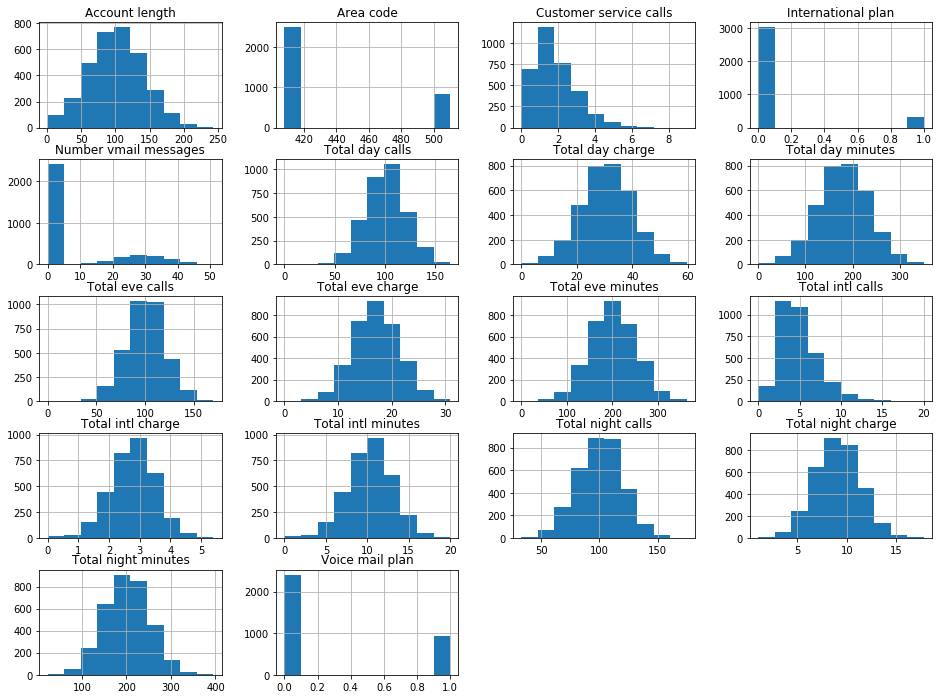

In [14]:
plt.rcParams['figure.figsize'] = 16,12
df.drop(['State', 'Churn'],axis=1).hist();

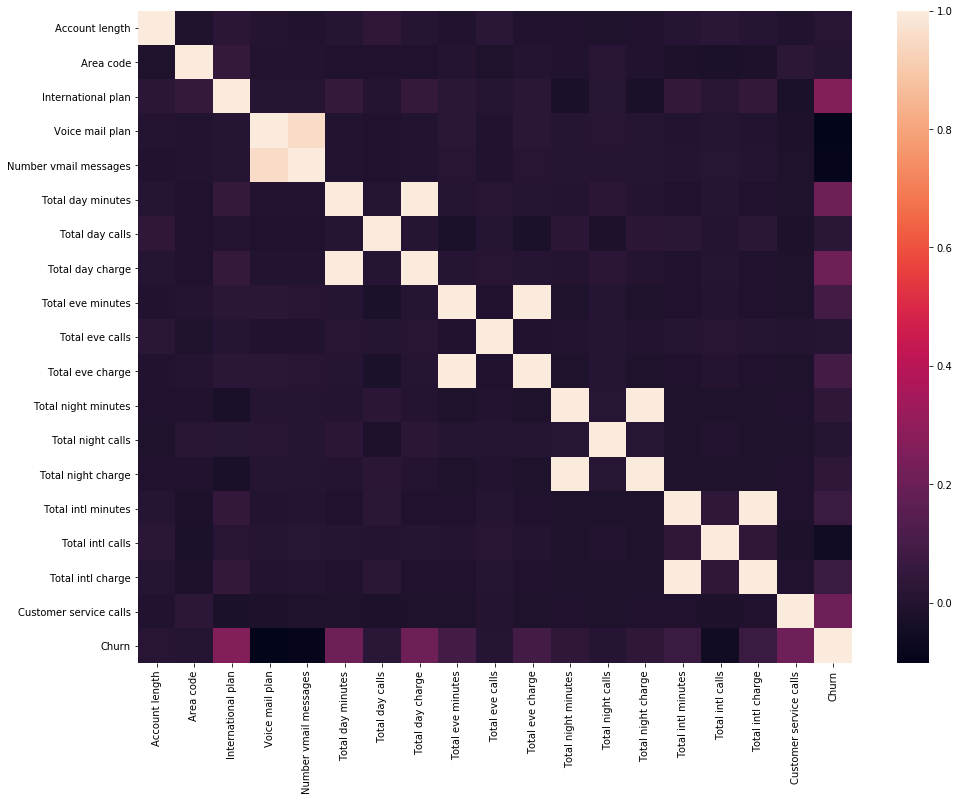

In [17]:
sns.heatmap(df.corr());

In [20]:
[feat_name for feat_name in df.columns
if 'charge' in feat_name]

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

In [25]:
df.drop([feat_name for feat_name in df.columns
if 'charge' in feat_name], axis=1, inplace=True)

### inplace=True changes the original dataset

In [26]:
df.shape

(3333, 16)

### TSNE = T-distributed, stock, neighbour, embedding

In [49]:
from sklearn.manifold import TSNE

In [45]:
    df.shape

(3333, 16)

In [46]:
state = df['State']
df.drop('State', axis=1, inplace=True)

In [47]:
df.shape

(3333, 15)

In [50]:
tsne = TSNE(random_state=17)

In [53]:
X_repr_churn = tsne.fit_transform(df[df['Churn'] == 1])

In [61]:
X_repr_loyl = tsne.fit_transform(df[df['Churn'] == 0])

In [66]:
%%time
X_repr = tsne.fit_transform(df)

Wall time: 2min 3s


In [67]:
x_repr.shape

NameError: name 'x_repr' is not defined

In [58]:
plt.scatter(x_repr[:,0], X_repr[:,1]);

NameError: name 'x_repr' is not defined

In [68]:
plt.rcParams['figure.figsize'] = (8,6)
plt.scatter(x_repr[df['Churn'] == 1,0],
            x_repr[df['Churn'] == 1,1],alpha=.5,c='blue', label='Churn')
plt.scatter(x_repr[df['Churn'] == 0,0],
            x_repr[df['Churn'] == 0,1],alpha=.5,c='orange', label='Loyal')
plt.xlabel('tsne axis # 1')
plt.ylabel('tsne axis # 2')
plt.legend()
plt.title('tsne rpresentation')
plt.savefig('Churn_tsne.png', dpi=300);

NameError: name 'x_repr' is not defined

### Features one at a time
### Numeric

In [27]:
df['Total day minutes'].describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: Total day minutes, dtype: float64

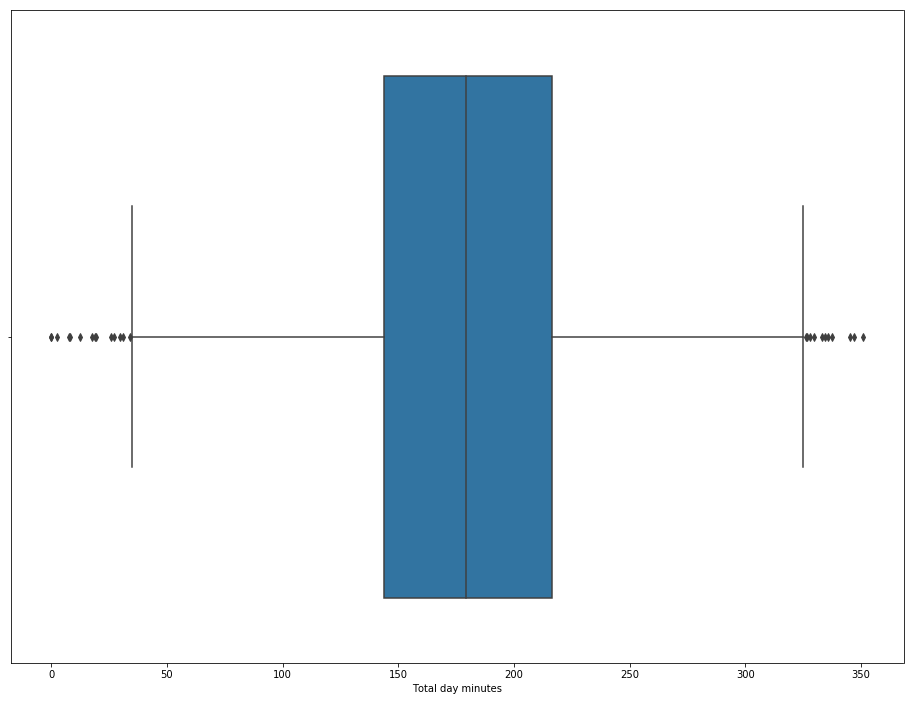

In [28]:
sns.boxplot(x='Total day minutes', data=df);

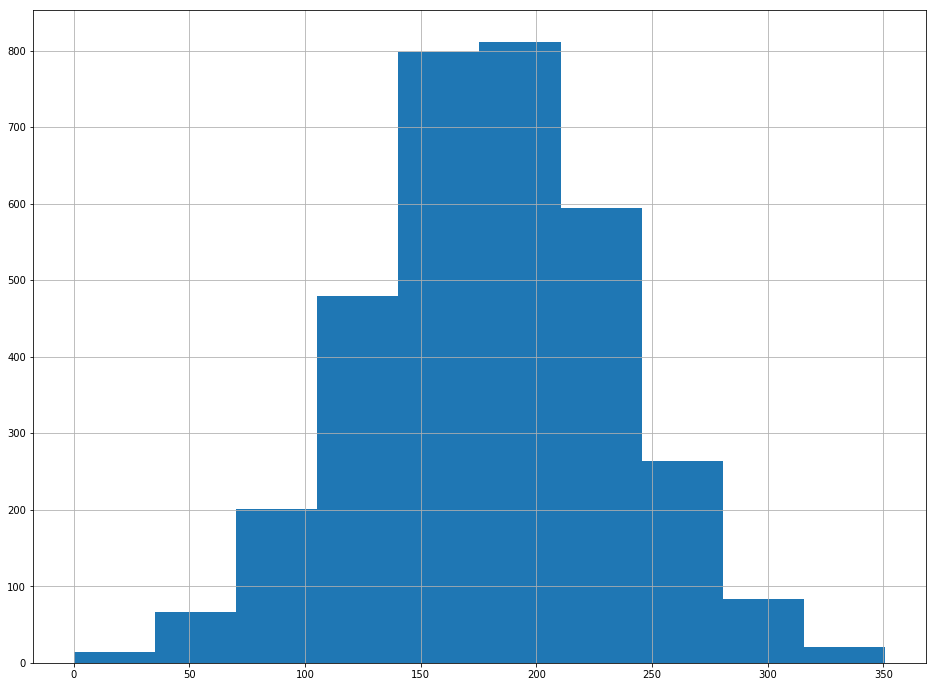

In [33]:
plt.rcParams['figure.figsize'] == (3,3)
df['Total day minutes'].hist();

### Categorical

In [35]:
df['State'].nunique()

51

In [37]:
df['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
OH     78
Name: State, dtype: int64

In [38]:
df['Churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: Churn, dtype: float64

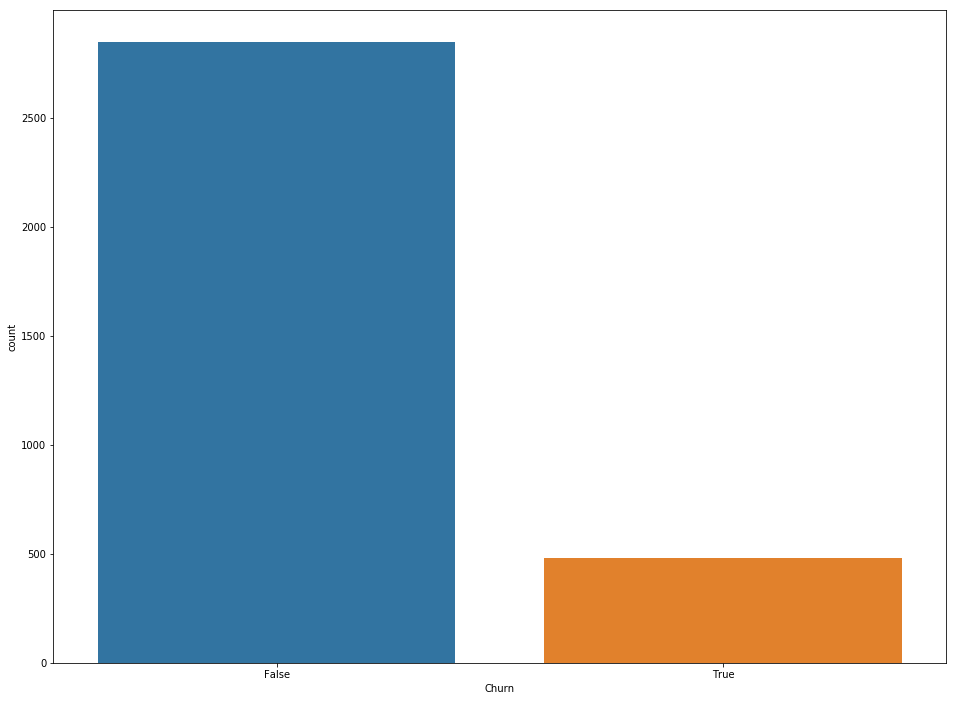

In [39]:
sns.countplot(x='Churn', data=df);

### Interaction between Features

### Numeric-Numeric

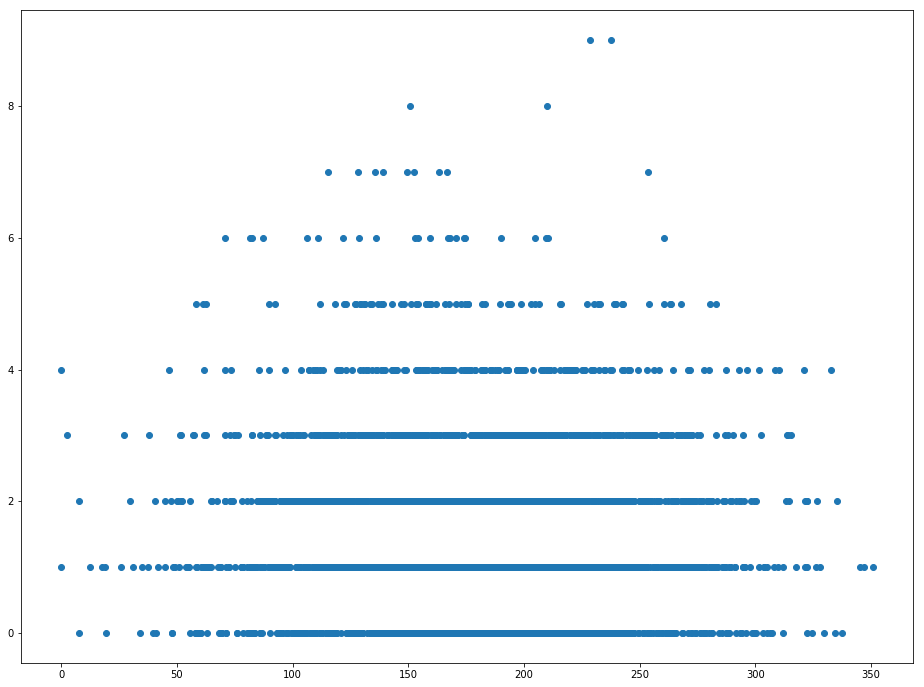

In [40]:
plt.scatter(df['Total day minutes'],
            df['Customer service calls']);

### Categorical-Categorical

In [41]:
pd.crosstab(df['Churn'], df['Customer service calls'])

Customer service calls,0,1,2,3,4,5,6,7,8,9
Churn,,,,,,,,,,
False,605,1059,672,385,90,26,8,4,1,0
True,92,122,87,44,76,40,14,5,1,2


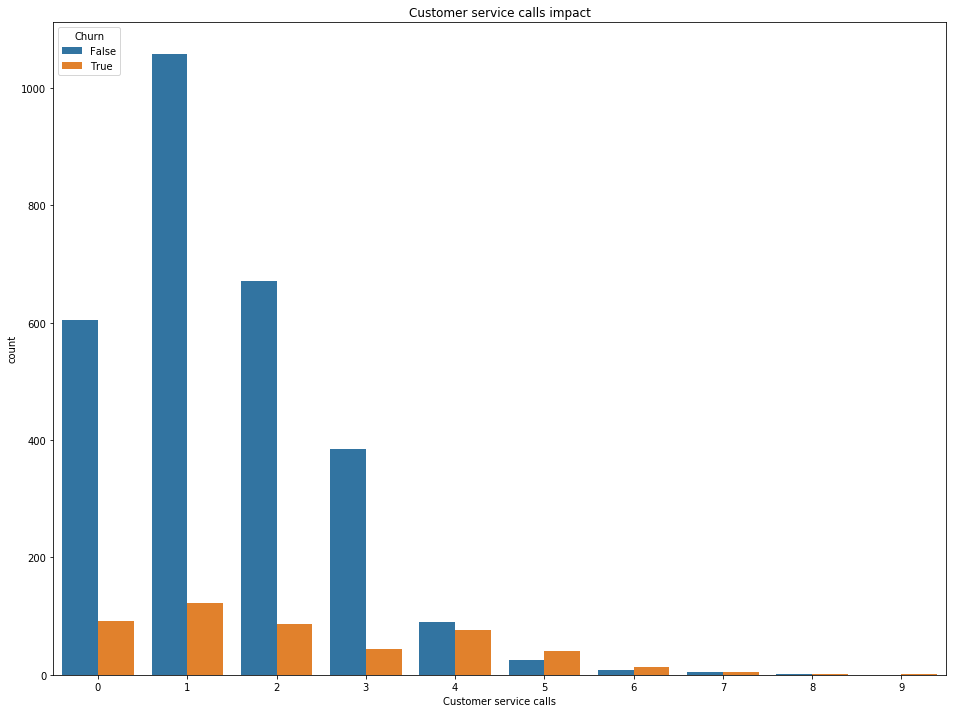

In [44]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);
plt.title('Customer service calls impact');

### Categorical-Numeric

In [69]:
import numpy as np

In [72]:
df.groupby('Churn')['Total day minutes', 'Customer service calls'].agg([np.median, np.std])

Total day minutes            Customer service calls          
                 median        std                 median       std
Churn                                                              
False             177.2  50.181655                      1  1.163883
True              217.6  68.997792                      2  1.853275

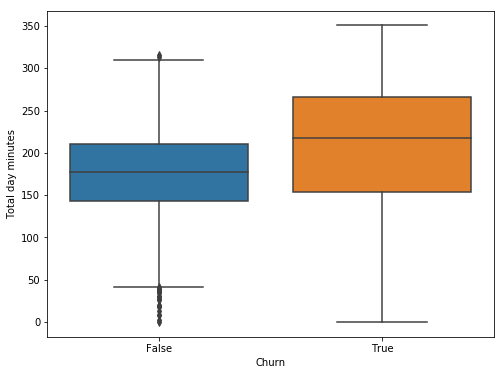

In [73]:
sns.boxplot(x='Churn', y='Total day minutes', data=df);